# Analiza danych OtoDom

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import folium

In [2]:
pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 100)

In [3]:
df = pd.read_csv("data/otodom_houses.csv", sep=",")

In [4]:
sys.getsizeof(df) / 1024 / 1024

54.96275329589844

In [5]:
df.memory_usage().sum() / 1024 / 1024

np.float64(7.229114532470703)

In [6]:
df = pd.read_csv("data/otodom_houses.csv", parse_dates=["utc_created_at"], dtype={"number_id": pd.Int32Dtype(), "price": pd.Int32Dtype(), "latitude": pd.Float32Dtype(), "longitude": pd.Float32Dtype(),"lot_area": pd.Int16Dtype(), "house_area": pd.Int16Dtype(), "n_rooms": pd.Int8Dtype(), "floors": pd.Float32Dtype(), "build_year": pd.Float32Dtype()})

In [7]:
sys.getsizeof(df) / 1024 / 1024

51.6958065032959

In [8]:
df.memory_usage().sum() / 1024 / 1024

np.float64(6.047452926635742)

In [9]:
df.head(3)

,number_id,short_id,long_id,url,title,price,advertiser_type,advert_type,utc_created_at,utc_scraped_at,city,subregion,province,location,latitude,longitude,market,building_type,house_features,lot_area,house_area,n_rooms,floors,heating,build_year,media
0,64453631,4mrkH,dom-129-m2-blizniak-4-pokoje-salon-ID4mrkH,https://www.otodom.pl/pl/oferta/dom-129-m2-bli...,DOM 129 m2 Bliżniak 4-POKOJE +SALON,399990,private,PRIVATE,2023-07-26 09:29:53,2023-07-28 13:00:08.104138,Dąbrowa Górnicza,powiat-dabrowa-gornicza,slaskie,suburban,50.397476,19.237482,PRIMARY,semi_detached,"{""Media"": [""prąd"", ""gaz"", ""woda""], ""Dojazd"": [...",400,129,5,<NA>,NaN,2023.0,electricity|gas|water
1,64453626,4mrkC,dom-wolnostojacy-pod-glogowem-okazja-ID4mrkC,https://www.otodom.pl/pl/oferta/dom-wolnostoja...,Dom wolnostojący pod Głogowem - Okazja !!,540000,business,AGENCY,2023-07-26 09:25:09,2023-07-28 13:00:17.279681,Szczyglice,powiat-glogowski,dolnoslaskie,NaN,51.629921,16.12916,PRIMARY,detached,"{""Ogrodzenie"": [""inne""], ""Media"": [""szambo"", ""...",1100,155,5,<NA>,NaN,2023.0,cesspool|electricity|water
2,64453451,4mrhN,funkcjonalny-nowy-dom-w-spokojnej-okolicy-w-st...,https://www.otodom.pl/pl/oferta/funkcjonalny-n...,Funkcjonalny nowy dom w spokojnej okolicy w st...,599000,private,PRIVATE,2023-07-26 08:53:05,2023-07-28 13:00:21.437902,Wanaty,powiat-czestochowski,slaskie,country,50.69437,19.137991,PRIMARY,detached,"{""Zabezpieczenia"": [""drzwi / okna antywłamanio...",724,100,4,<NA>,gas,2023.0,cesspool|electricity|gas|internet|water


In [10]:
df.columns

Index(['number_id', 'short_id', 'long_id', 'url', 'title', 'price',
       'advertiser_type', 'advert_type', 'utc_created_at', 'utc_scraped_at',
       'city', 'subregion', 'province', 'location', 'latitude', 'longitude',
       'market', 'building_type', 'house_features', 'lot_area', 'house_area',
       'n_rooms', 'floors', 'heating', 'build_year', 'media'],
      dtype='object')

In [11]:
df = df.drop(columns=['number_id', 'short_id', 'long_id', 'title', 'utc_scraped_at'])
df.head(3)

,url,price,advertiser_type,advert_type,utc_created_at,city,subregion,province,location,latitude,longitude,market,building_type,house_features,lot_area,house_area,n_rooms,floors,heating,build_year,media
0,https://www.otodom.pl/pl/oferta/dom-129-m2-bli...,399990,private,PRIVATE,2023-07-26 09:29:53,Dąbrowa Górnicza,powiat-dabrowa-gornicza,slaskie,suburban,50.397476,19.237482,PRIMARY,semi_detached,"{""Media"": [""prąd"", ""gaz"", ""woda""], ""Dojazd"": [...",400,129,5,<NA>,NaN,2023.0,electricity|gas|water
1,https://www.otodom.pl/pl/oferta/dom-wolnostoja...,540000,business,AGENCY,2023-07-26 09:25:09,Szczyglice,powiat-glogowski,dolnoslaskie,NaN,51.629921,16.12916,PRIMARY,detached,"{""Ogrodzenie"": [""inne""], ""Media"": [""szambo"", ""...",1100,155,5,<NA>,NaN,2023.0,cesspool|electricity|water
2,https://www.otodom.pl/pl/oferta/funkcjonalny-n...,599000,private,PRIVATE,2023-07-26 08:53:05,Wanaty,powiat-czestochowski,slaskie,country,50.69437,19.137991,PRIMARY,detached,"{""Zabezpieczenia"": [""drzwi / okna antywłamanio...",724,100,4,<NA>,gas,2023.0,cesspool|electricity|gas|internet|water


In [12]:
df.loc[0].house_features

'{"Media": ["prąd", "gaz", "woda"], "Dojazd": ["asfaltowy"], "Okolica": ["jezioro"], "Informacje dodatkowe": ["strych", "garaż"]}'

In [13]:
df.head(3)

,url,price,advertiser_type,advert_type,utc_created_at,city,subregion,province,location,latitude,longitude,market,building_type,house_features,lot_area,house_area,n_rooms,floors,heating,build_year,media
0,https://www.otodom.pl/pl/oferta/dom-129-m2-bli...,399990,private,PRIVATE,2023-07-26 09:29:53,Dąbrowa Górnicza,powiat-dabrowa-gornicza,slaskie,suburban,50.397476,19.237482,PRIMARY,semi_detached,"{""Media"": [""prąd"", ""gaz"", ""woda""], ""Dojazd"": [...",400,129,5,<NA>,NaN,2023.0,electricity|gas|water
1,https://www.otodom.pl/pl/oferta/dom-wolnostoja...,540000,business,AGENCY,2023-07-26 09:25:09,Szczyglice,powiat-glogowski,dolnoslaskie,NaN,51.629921,16.12916,PRIMARY,detached,"{""Ogrodzenie"": [""inne""], ""Media"": [""szambo"", ""...",1100,155,5,<NA>,NaN,2023.0,cesspool|electricity|water
2,https://www.otodom.pl/pl/oferta/funkcjonalny-n...,599000,private,PRIVATE,2023-07-26 08:53:05,Wanaty,powiat-czestochowski,slaskie,country,50.69437,19.137991,PRIMARY,detached,"{""Zabezpieczenia"": [""drzwi / okna antywłamanio...",724,100,4,<NA>,gas,2023.0,cesspool|electricity|gas|internet|water


In [14]:
df.dtypes

url                        object
price                       Int32
advertiser_type            object
advert_type                object
utc_created_at     datetime64[ns]
city                       object
subregion                  object
province                   object
location                   object
latitude                  Float32
longitude                 Float32
market                     object
building_type              object
house_features             object
lot_area                    Int16
house_area                  Int16
n_rooms                      Int8
floors                    Float32
heating                    object
build_year                Float32
media                      object
dtype: object

In [15]:
df.select_dtypes([int, float]).columns

Index(['price', 'latitude', 'longitude', 'floors', 'build_year'], dtype='object')

In [16]:
df.head(2)

,url,price,advertiser_type,advert_type,utc_created_at,city,subregion,province,location,latitude,longitude,market,building_type,house_features,lot_area,house_area,n_rooms,floors,heating,build_year,media
0,https://www.otodom.pl/pl/oferta/dom-129-m2-bli...,399990,private,PRIVATE,2023-07-26 09:29:53,Dąbrowa Górnicza,powiat-dabrowa-gornicza,slaskie,suburban,50.397476,19.237482,PRIMARY,semi_detached,"{""Media"": [""prąd"", ""gaz"", ""woda""], ""Dojazd"": [...",400,129,5,<NA>,NaN,2023.0,electricity|gas|water
1,https://www.otodom.pl/pl/oferta/dom-wolnostoja...,540000,business,AGENCY,2023-07-26 09:25:09,Szczyglice,powiat-glogowski,dolnoslaskie,NaN,51.629921,16.12916,PRIMARY,detached,"{""Ogrodzenie"": [""inne""], ""Media"": [""szambo"", ""...",1100,155,5,<NA>,NaN,2023.0,cesspool|electricity|water


In [17]:
df['heating'].value_counts(dropna=False)

heating
NaN                            12927
gas                            10394
heat_pump                       4130
coal                            2221
fireplace|gas                   1726
                               ...  
urban|fireplace                    1
stove|urban                        1
fireplace|biomass                  1
biomass|oil|solar_collector        1
biomass|gas|solar_collector        1
Name: count, Length: 179, dtype: int64

In [18]:
df.columns

Index(['url', 'price', 'advertiser_type', 'advert_type', 'utc_created_at',
       'city', 'subregion', 'province', 'location', 'latitude', 'longitude',
       'market', 'building_type', 'house_features', 'lot_area', 'house_area',
       'n_rooms', 'floors', 'heating', 'build_year', 'media'],
      dtype='object')

In [19]:
categorical = ['advertiser_type', 'advert_type','city', 'subregion','province', 'location', 'market', 'building_type']

In [20]:
df[categorical] = df[categorical].astype(pd.CategoricalDtype())

In [21]:
df.dtypes

url                        object
price                       Int32
advertiser_type          category
advert_type              category
utc_created_at     datetime64[ns]
city                     category
subregion                category
province                 category
location                 category
latitude                  Float32
longitude                 Float32
market                   category
building_type            category
house_features             object
lot_area                    Int16
house_area                  Int16
n_rooms                      Int8
floors                    Float32
heating                    object
build_year                Float32
media                      object
dtype: object

In [22]:
sys.getsizeof(df) / 1024 / 1024

24.19540023803711

In [23]:
df.memory_usage().sum() / 1024 / 1024

np.float64(3.1972780227661133)

In [24]:
df.memory_usage()

Index                 132
url                291544
price              182215
advertiser_type     36567
advert_type         36575
utc_created_at     291544
city               387838
subregion           84206
province            37127
location            36575
latitude           182215
longitude          182215
market              36567
building_type       36663
house_features     291544
lot_area           109329
house_area         109329
n_rooms             72886
floors             182215
heating            291544
build_year         182215
media              291544
dtype: int64

## Analiza wstępna

In [25]:
df.describe()

,price,utc_created_at,latitude,longitude,lot_area,house_area,n_rooms,floors,build_year
count,36443.0,36443,36443.0,36443.0,36443.0,36443.0,36443.0,22862.0,36432.0
mean,809312.458524,2024-01-03 10:11:52.104656640,51.823013,19.043816,942.6573,145.074472,4.706254,1.220934,2008.261963
min,54600.0,2023-07-25 09:30:17,0.0791,0.08569,1.0,48.0,1.0,1.0,1900.0
25%,600000.0,2023-10-19 18:37:50.500000,50.64003,17.214845,467.0,115.0,4.0,1.0,1999.0
50%,790000.0,2024-01-16 13:32:02,51.99345,18.982401,705.0,139.0,5.0,1.0,2019.0
75%,977000.0,2024-03-15 23:45:39,52.63619,20.69509,1081.0,170.0,5.0,1.0,2023.0
max,1650000.0,2024-05-17 09:11:17,89.981926,141.478165,5000.0,450.0,10.0,2.0,2025.0
std,288688.275137,NaN,1.493276,2.769666,753.800867,39.84679,1.088182,0.414891,19.620848


In [26]:
df.isna().sum()

url                    0
price                  0
advertiser_type        0
advert_type            0
utc_created_at         0
city                   0
subregion              0
province               0
location           21040
latitude               0
longitude              0
market                 0
building_type       2479
house_features         0
lot_area               0
house_area             0
n_rooms                0
floors             13581
heating            12927
build_year            11
media               6529
dtype: int64

In [27]:
df.isna().mean() * 100

url                 0.000000
price               0.000000
advertiser_type     0.000000
advert_type         0.000000
utc_created_at      0.000000
city                0.000000
subregion           0.000000
province            0.000000
location           57.733996
latitude            0.000000
longitude           0.000000
market              0.000000
building_type       6.802404
house_features      0.000000
lot_area            0.000000
house_area          0.000000
n_rooms             0.000000
floors             37.266416
heating            35.471833
build_year          0.030184
media              17.915649
dtype: float64

## Analiza rozkładu pojedynczych cech

In [28]:
df.head(2)

,url,price,advertiser_type,advert_type,utc_created_at,city,subregion,province,location,latitude,longitude,market,building_type,house_features,lot_area,house_area,n_rooms,floors,heating,build_year,media
0,https://www.otodom.pl/pl/oferta/dom-129-m2-bli...,399990,private,PRIVATE,2023-07-26 09:29:53,Dąbrowa Górnicza,powiat-dabrowa-gornicza,slaskie,suburban,50.397476,19.237482,PRIMARY,semi_detached,"{""Media"": [""prąd"", ""gaz"", ""woda""], ""Dojazd"": [...",400,129,5,<NA>,NaN,2023.0,electricity|gas|water
1,https://www.otodom.pl/pl/oferta/dom-wolnostoja...,540000,business,AGENCY,2023-07-26 09:25:09,Szczyglice,powiat-glogowski,dolnoslaskie,NaN,51.629921,16.12916,PRIMARY,detached,"{""Ogrodzenie"": [""inne""], ""Media"": [""szambo"", ""...",1100,155,5,<NA>,NaN,2023.0,cesspool|electricity|water


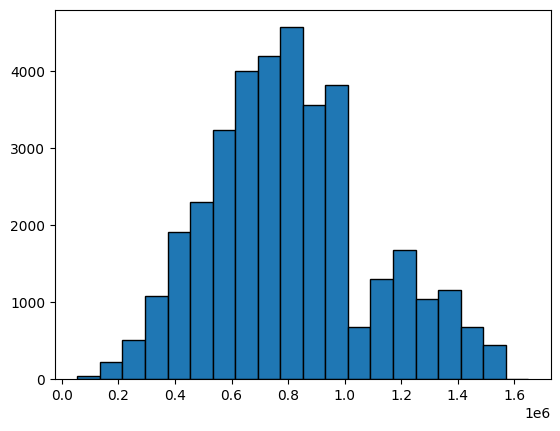

In [29]:
plt.hist(df.price, bins=20, edgecolor="k");

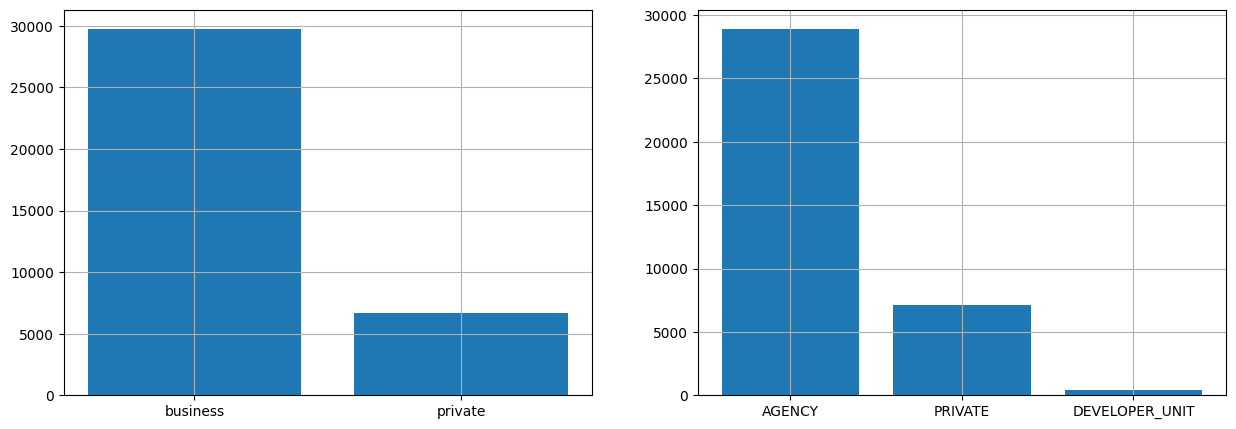

In [30]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].bar((data := df["advertiser_type"].value_counts()).index, data);
ax[1].bar((data := df["advert_type"].value_counts()).index, data);
for a in ax:
    a.grid()

In [31]:
df.head(2)

,url,price,advertiser_type,advert_type,utc_created_at,city,subregion,province,location,latitude,longitude,market,building_type,house_features,lot_area,house_area,n_rooms,floors,heating,build_year,media
0,https://www.otodom.pl/pl/oferta/dom-129-m2-bli...,399990,private,PRIVATE,2023-07-26 09:29:53,Dąbrowa Górnicza,powiat-dabrowa-gornicza,slaskie,suburban,50.397476,19.237482,PRIMARY,semi_detached,"{""Media"": [""prąd"", ""gaz"", ""woda""], ""Dojazd"": [...",400,129,5,<NA>,NaN,2023.0,electricity|gas|water
1,https://www.otodom.pl/pl/oferta/dom-wolnostoja...,540000,business,AGENCY,2023-07-26 09:25:09,Szczyglice,powiat-glogowski,dolnoslaskie,NaN,51.629921,16.12916,PRIMARY,detached,"{""Ogrodzenie"": [""inne""], ""Media"": [""szambo"", ""...",1100,155,5,<NA>,NaN,2023.0,cesspool|electricity|water


In [32]:
# df.utc_scraped_at.dt.month_name().value_counts()

<BarContainer object of 11 artists>

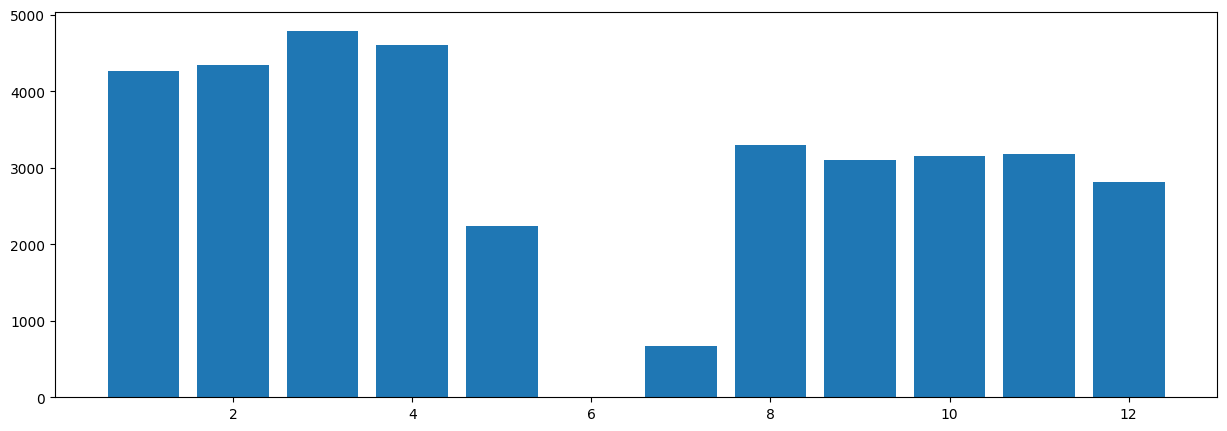

In [33]:
plt.figure(figsize=(15,5))
plt.bar((data := df.utc_created_at.dt.month.value_counts().sort_index()).index, data)

<BarContainer object of 7 artists>

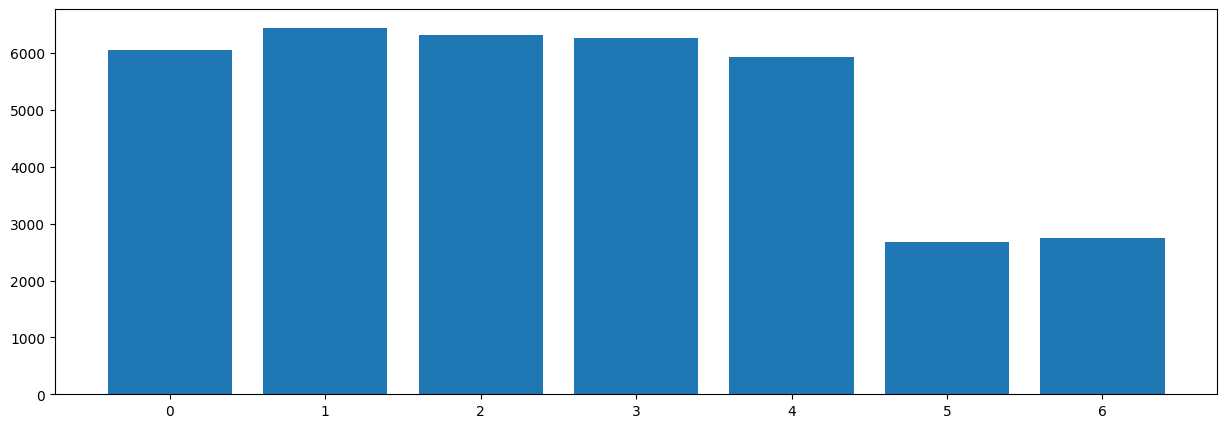

In [34]:
plt.figure(figsize=(15,5))
plt.bar((data := df.utc_created_at.dt.day_of_week.value_counts().sort_index()).index, data)

<BarContainer object of 24 artists>

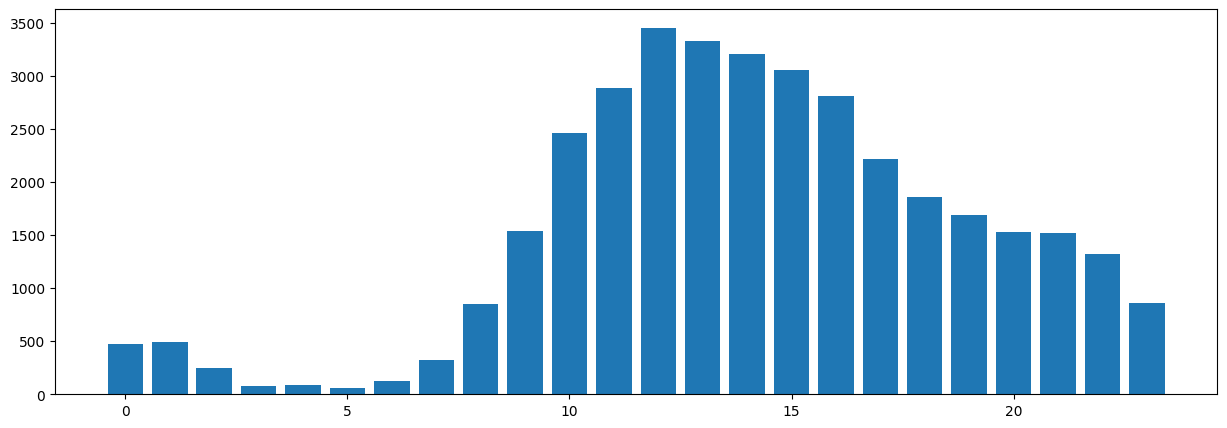

In [35]:
plt.figure(figsize=(15,5))
plt.bar((data := df.utc_created_at.dt.hour.value_counts().sort_index()).index, data)

In [45]:
locations = np.array(list(zip(df['latitude'], df['longitude'])))

mymap = folium.Map(location=locations.mean(axis=0), zoom_start=6)

for lat, lon in locations[:100]:
    folium.Marker([lat, lon]).add_to(mymap)
    # folium.CircleMarker([lat, lon], raaius=1).add_to(mymap)

display(mymap)

## Analiza zależności między zmiennymi

In [37]:
df.head(2)

,url,price,advertiser_type,advert_type,utc_created_at,city,subregion,province,location,latitude,longitude,market,building_type,house_features,lot_area,house_area,n_rooms,floors,heating,build_year,media
0,https://www.otodom.pl/pl/oferta/dom-129-m2-bli...,399990,private,PRIVATE,2023-07-26 09:29:53,Dąbrowa Górnicza,powiat-dabrowa-gornicza,slaskie,suburban,50.397476,19.237482,PRIMARY,semi_detached,"{""Media"": [""prąd"", ""gaz"", ""woda""], ""Dojazd"": [...",400,129,5,<NA>,NaN,2023.0,electricity|gas|water
1,https://www.otodom.pl/pl/oferta/dom-wolnostoja...,540000,business,AGENCY,2023-07-26 09:25:09,Szczyglice,powiat-glogowski,dolnoslaskie,NaN,51.629921,16.12916,PRIMARY,detached,"{""Ogrodzenie"": [""inne""], ""Media"": [""szambo"", ""...",1100,155,5,<NA>,NaN,2023.0,cesspool|electricity|water


### Średnia cena w województwach

C:\Users\mlempicki\AppData\Local\Temp\ipykernel_12196\3514070345.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  plt.bar((data := df.groupby("province").price.mean().sort_values()).index, data)


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, 'swietokrzyskie'),
  Text(1, 0, 'podkarpackie'),
  Text(2, 0, 'podlaskie'),
  Text(3, 0, 'kujawsko-pomorskie'),
  Text(4, 0, 'opolskie'),
  Text(5, 0, 'slaskie'),
  Text(6, 0, 'lubelskie'),
  Text(7, 0, 'wielkopolskie'),
  Text(8, 0, 'warminsko-mazurskie'),
  Text(9, 0, 'lodzkie'),
  Text(10, 0, 'lubuskie'),
  Text(11, 0, 'malopolskie'),
  Text(12, 0, 'pomorskie'),
  Text(13, 0, 'zachodniopomorskie'),
  Text(14, 0, 'dolnoslaskie'),
  Text(15, 0, 'mazowieckie')])

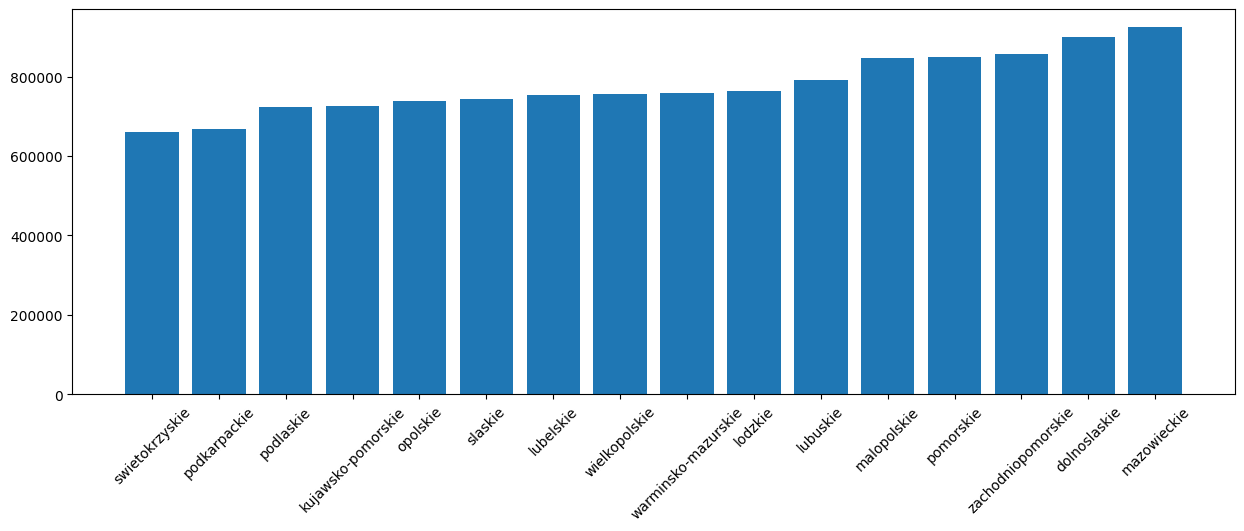

In [38]:
plt.figure(figsize=(15,5))
plt.bar((data := df.groupby("province").price.mean().sort_values()).index, data)
plt.xticks(rotation=45)

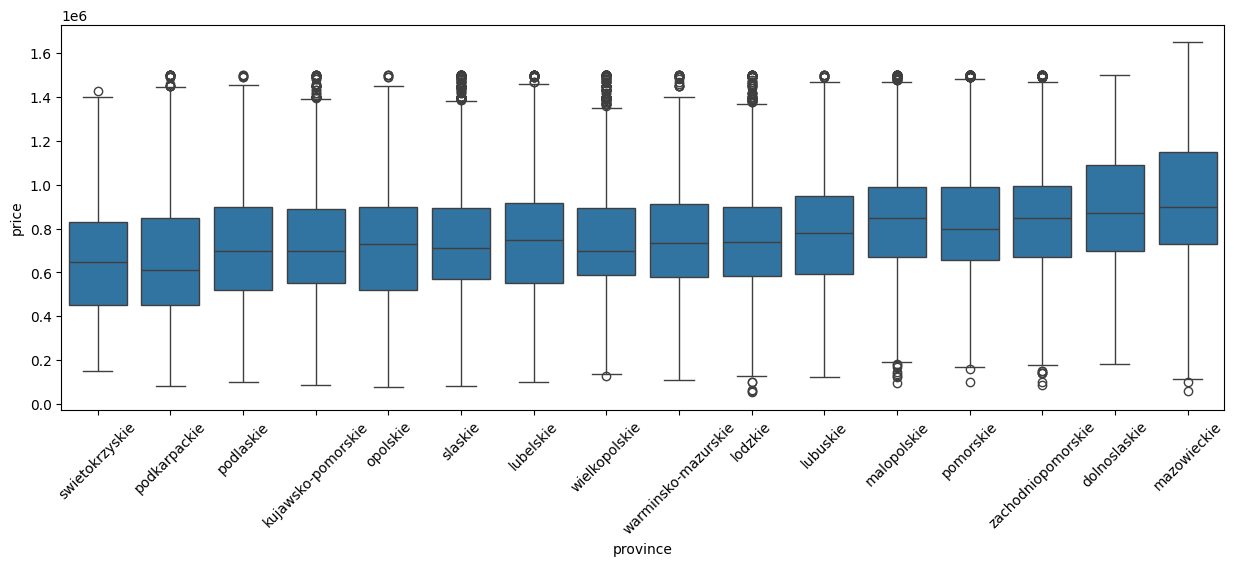

In [39]:
plt.figure(figsize=(15,5))
sns.boxplot(data=df, x="province", y="price", order=data.index)
plt.xticks(rotation=45);

In [40]:
data = (
    df.dropna(subset='build_year')
    .drop(columns=df.columns[:15])
    .drop(columns=df.columns[-4])
    .drop(columns=['heating', 'media'])
    .assign(mean_room_area=lambda df: df["house_area"] / df["n_rooms"])
    .groupby("build_year")
    .agg('mean')
    .filter(["mean_room_area"])
)

(1945.0, 2024.0)

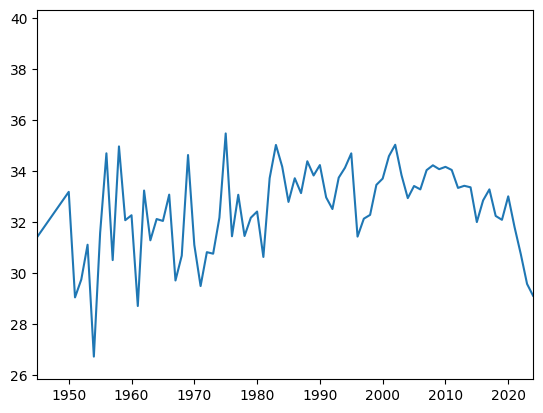

In [41]:
plt.plot(data.index, data.values)
plt.xlim(1945, 2024)

(0.0, 40.324999999999996)

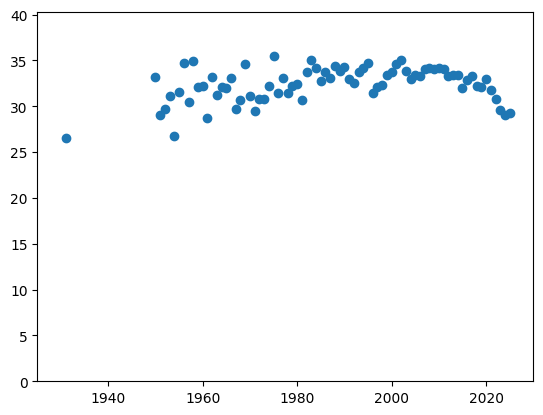

In [42]:
plt.scatter(data.index, data.values)
plt.xlim(1925, 2030)
plt.ylim(0)

In [43]:
df.head(2)

,url,price,advertiser_type,advert_type,utc_created_at,city,subregion,province,location,latitude,longitude,market,building_type,house_features,lot_area,house_area,n_rooms,floors,heating,build_year,media
0,https://www.otodom.pl/pl/oferta/dom-129-m2-bli...,399990,private,PRIVATE,2023-07-26 09:29:53,Dąbrowa Górnicza,powiat-dabrowa-gornicza,slaskie,suburban,50.397476,19.237482,PRIMARY,semi_detached,"{""Media"": [""prąd"", ""gaz"", ""woda""], ""Dojazd"": [...",400,129,5,<NA>,NaN,2023.0,electricity|gas|water
1,https://www.otodom.pl/pl/oferta/dom-wolnostoja...,540000,business,AGENCY,2023-07-26 09:25:09,Szczyglice,powiat-glogowski,dolnoslaskie,NaN,51.629921,16.12916,PRIMARY,detached,"{""Ogrodzenie"": [""inne""], ""Media"": [""szambo"", ""...",1100,155,5,<NA>,NaN,2023.0,cesspool|electricity|water


### średnia wielkość działki w województwach

In [44]:
data = (
    df.dropna(subset='lot_area')
    .assign(mean_room_area=lambda df: df["house_area"] / df["n_rooms"])
    .groupby("lot_area")
    .agg('mean')
    .filter(["mean_room_area"])
)

TypeError: agg function failed [how->mean,dtype->object]

In [ ]:
data = (
    
    df.filter(["lot_area", "province"])
    .groupby("province")
    .agg('mean')
    .sort_values("lot_area")
)
data

In [ ]:
plt.figure(figsize=(15,5))
plt.bar(data.index, data["lot_area"])
plt.xticks(rotation=45)

In [ ]:
import sklearn
sklearn.__version__